In [1]:
import numpy as np
from matplotlib import pyplot as plt

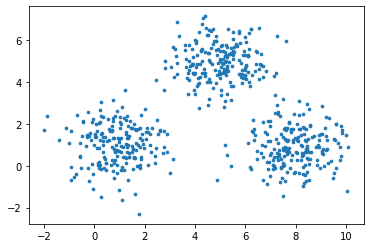

In [159]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

In [160]:
X = data

In [161]:
X

array([[ 4.89070633, -0.70225461],
       [ 2.58949585,  1.6887194 ],
       [ 1.47447206,  1.78381246],
       ...,
       [ 7.43913703, -0.56753714],
       [ 8.52992724,  0.09612241],
       [ 8.5756695 ,  1.95785637]])

In [162]:
X.shape

(600, 2)

In [163]:
N = X.shape[0] #number of training examples
M = X.shape[1] #number of features
K = 3 # number of clusters

In [164]:
N

600

In [165]:
M

2

In [166]:
K

3

In [167]:
centers = np.array([]).reshape(N,0) 
centers

array([], shape=(600, 0), dtype=float64)

In [170]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)

# Generate random centers, here we use sigma and mean to ensure it represent the whole data

centers = np.random.randn(K,M)*std + mean

print(centers)
print(centers[0], centers[0][0], centers[0][1])
print(centers[1])
print(centers[2])

[[7.23618311 1.1777064 ]
 [5.59104885 4.82219121]
 [6.88385221 0.33858155]]
[7.23618311 1.1777064 ] 7.236183110100325 1.1777064035540097
[5.59104885 4.82219121]
[6.88385221 0.33858155]


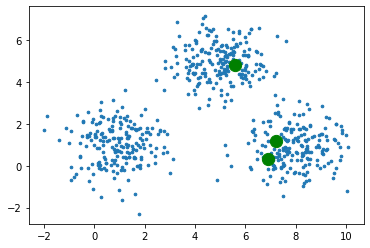

In [171]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='o', c='g', s=150)

In [172]:
output = {}

In [173]:
import math

cluster_dists = []
for i in range(K):
    cluster_dists.append(np.zeros(N))

for n in range(N):
    point = X[n]
    for k in range(K):
        cluster_center = centers[k]     
        cluster_dists[k][n] = math.sqrt(
            (point[0]-cluster_center[0])**2 + (point[1]-cluster_center[1])**2
        )

print(cluster_dists[0])
print(cluster_dists[1])
distances = [i for i in cluster_dists]
# euclidian_dist = np.c_[cluster_dists[0], cluster_dists[1], cluster_dists[2]]

# матрица евклидова расстояния каждой точки (строка) до каждого центроида (столбец)
euclidian_dist = np.c_[distances]
euclidian_dist

[3.00591329 4.67470178 5.79350316 6.04643707 7.39227719 7.11142054
 5.62599619 7.52432221 7.2039378  5.60011613 5.60147195 7.16792953
 6.54794755 6.59577836 7.7154975  5.91089908 6.68843721 5.55964107
 7.42835452 8.24692623 7.21990065 7.73398964 6.18769856 7.1749089
 6.08345126 6.84125859 5.91729307 5.64188879 5.89825623 5.72069083
 6.00120415 7.62082913 7.84837277 6.29270518 6.53969825 5.75845669
 5.51949904 6.90175061 6.58119661 7.2267538  7.53746841 5.44658023
 6.56750502 8.20666707 4.65054802 7.74199585 6.90056892 7.18034219
 6.87295268 7.4707808  8.04817541 8.22762675 6.22029991 4.4887596
 7.69914847 6.36427357 8.38467207 6.44056577 8.38787165 5.20968968
 6.04453908 6.52605988 4.98473597 5.2003841  7.05487662 6.47172103
 7.16584919 7.44772615 6.18933793 5.4529227  6.10594971 6.54110188
 7.59277435 7.86817485 5.03741171 7.39321723 6.35157881 7.10839942
 5.6266501  6.37009076 6.82367561 6.64001362 5.47124312 7.14135665
 4.3693763  5.73713945 5.85109033 7.25575911 6.56478289 6.007728

array([[3.00591329, 4.67470178, 5.79350316, ..., 1.75700465, 1.68629707,
        1.5501154 ],
       [5.56866064, 4.33912042, 5.11643919, ..., 5.69777164, 5.56531513,
        4.13671059],
       [2.2485485 , 4.50159624, 5.59911475, ..., 1.06272871, 1.66383577,
        2.34185753]])

In [174]:
# вектор индексов минимальных значений - самого минимального расстояния
C=np.argmin(euclidian_dist, axis=1)
C

array([400, 288, 580], dtype=int64)

In [175]:
lastmatches = None
new_centers = centers
for t in range(5000):
    print(f'iteration #{t}')
    bestmatches=[[] for i in range(K)]
    
    # для каждой точки находим ближайший центроид
    for idx, point in enumerate(X):
        bestmatch = 0
        distances = []
        for k in range(K):
            distance = euclidian_dist[k][idx]
            distances.append(distance)
            if distance < euclidian_dist[bestmatch][idx]:
                bestmatch = k
        # для каждого кластера будет список индексов точек,
        # которые распологаются к ним ближе, чем к другим
        bestmatches[bestmatch].append(idx)
        print(distances)
        print('min dist', euclidian_dist[np.argmin(distances)][idx])
        
    #
    if bestmatches == lastmatches:
        break
    lastmatches=bestmatches

    # надо расположить центроид на среднем расстоянии от приписанных к нему точек
    for k in range(K):
        avgs = np.zeros(M)
        print(bestmatches)
        if len(bestmatches[k]) > 0:
            for point_idx in bestmatches[k]:
                for m in range(M):
                    avgs[m] += X[point_idx][m]
            for j in range(len(avgs)):
                avgs[j] /= len(bestmatches[k])
            new_centers[k]=avgs
#     plt.scatter(data[:,0], data[:,1], s=7)
#     plt.scatter(new_centers[:,0], new_centers[:,1], marker='o', c='g', s=150)
#     plt.show()

iteration #0
[3.0059132907753994, 5.56866063528548, 2.2485485033780366]
min dist 2.2485485033780366
[4.674701783197585, 4.339120420544018, 4.501596241823778]
min dist 4.339120420544018
[5.793503156751116, 5.116439188537283, 5.599114752330507]
min dist 5.116439188537283
[6.04643706812433, 4.924193824388157, 5.93639341474506]
min dist 4.924193824388157
[7.392277185018486, 6.325196032904957, 7.196864464432817]
min dist 6.325196032904957
[7.111420544599829, 7.132012184543649, 6.68760597691576]
min dist 6.68760597691576
[5.625996191970942, 6.1951390887564335, 5.155411699693803]
min dist 5.155411699693803
[7.524322212220075, 6.7700690952953355, 7.253459865661212]
min dist 6.7700690952953355
[7.203937803870306, 5.59593615099135, 7.139721829195208]
min dist 5.59593615099135
[5.600116127525001, 5.672562454564846, 5.245890097027893]
min dist 5.245890097027893
[5.601471951858944, 5.435318965046999, 5.302694360613124]
min dist 5.302694360613124
[7.167929528022794, 5.79774720059791, 7.0511542357145

[5.483107084641668, 2.5633384162401955, 5.816714089838454]
min dist 2.5633384162401955
[3.2009229082189483, 0.8107331629298115, 3.9002495704572477]
min dist 0.8107331629298115
[4.3220164117032915, 1.2533136544482348, 4.793639509743045]
min dist 1.2533136544482348
[4.643799455671253, 1.7299254302862719, 5.048340494733907]
min dist 1.7299254302862719
[4.805992723124727, 0.9023697032173961, 5.5178655780798955]
min dist 0.9023697032173961
[4.463933171177309, 0.48154975218822266, 5.1440255619433275]
min dist 0.48154975218822266
[6.093225326240515, 2.604787739311566, 6.528554860621633]
min dist 2.604787739311566
[4.4861409391968525, 0.5802940874084522, 5.104502403740677]
min dist 0.5802940874084522
[4.115100524103891, 1.8373977135527602, 4.4640311780585655]
min dist 1.8373977135527602
[3.65587728945999, 1.163776318062773, 4.139078252247586]
min dist 1.163776318062773
[4.310928630581461, 0.4005645796158809, 4.939638551045701]
min dist 0.4005645796158809
[5.8555246179876175, 1.8664342556490467

min dist 5.364461427624884
[7.255759111480389, 6.7878362667616035, 6.932697670035774]
min dist 6.7878362667616035
[6.564782894280323, 5.79976829704818, 6.341681509201409]
min dist 5.79976829704818
[6.007728092358754, 5.460964965826144, 5.768545709833149]
min dist 5.460964965826144
[6.476555970650418, 6.270850535667889, 6.132210744306818]
min dist 6.132210744306818
[7.155755293511534, 7.319531854926921, 6.69935538306046]
min dist 6.69935538306046
[6.96776695851747, 7.182232815168751, 6.508023330313909]
min dist 6.508023330313909
[5.961957727312898, 5.166064267163147, 5.782997731076114]
min dist 5.166064267163147
[6.4486625135189914, 6.31347332172198, 6.089995326770435]
min dist 6.089995326770435
[6.671519160524742, 7.047466680263062, 6.189524411140795]
min dist 6.189524411140795
[6.871116761180976, 6.849868349306716, 6.466684146074124]
min dist 6.466684146074124
[7.112409761567211, 6.075552679016611, 6.922787353147373]
min dist 6.075552679016611
[8.181022364462747, 7.239425143938261, 7.

[0.8941907182440808, 4.273670264989745, 1.6015956436679177]
min dist 0.8941907182440808
[0.8502994726655944, 4.413160953561235, 1.4690603894958332]
min dist 0.8502994726655944
[1.398312361460831, 5.101257096587947, 1.6791999392500911]
min dist 1.398312361460831
[1.1281694692010134, 4.281047366988968, 1.8517102276200441]
min dist 1.1281694692010134
[0.9889883977799455, 3.029630016914041, 1.8009158868938469]
min dist 0.9889883977799455
[1.0398501867083196, 3.4840552400724, 1.9467639678110207]
min dist 1.0398501867083196
[0.7506850874051583, 3.250428810471232, 1.5471790769545017]
min dist 0.7506850874051583
[0.483668062740894, 3.5634537918356664, 1.1588754103832246]
min dist 0.483668062740894
[0.6657362859398274, 3.694311382823484, 1.5682233392874927]
min dist 0.6657362859398274
[0.7042214416679045, 3.638403948750409, 1.610706711865593]
min dist 0.7042214416679045
[2.1828165834029516, 4.8540413494401085, 1.5120807864449513]
min dist 1.5120807864449513
[2.3697922710985337, 5.98240839726219

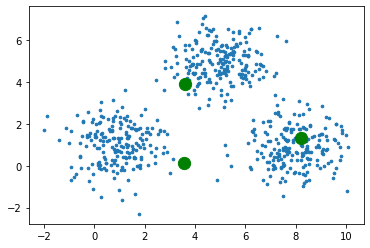

In [176]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(new_centers[:,0], new_centers[:,1], marker='o', c='g', s=150)
plt.show()

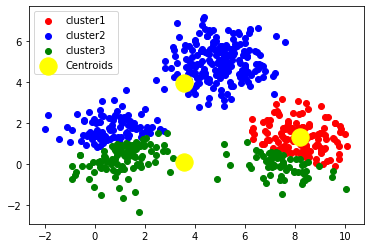

In [179]:
Output = {}

# def color():
#     return list(np.random.choice(range(256), size=3))
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3',]

Output[0] = np.empty([len(bestmatches[0]), 2])
# print(Output[0])
for i in range(len(Output[0])):
#     print(X[bestmatches[0][i]])
#     print(Output[0][i])
    Output[0][i] = X[bestmatches[0][i]]
    
Output[1] = np.empty([len(bestmatches[1]), 2])
for i in range(len(Output[1])):
    Output[1][i] = X[bestmatches[1][i]]


Output[2] = np.empty([len(bestmatches[2]), 2])
for i in range(len(Output[2])):
    Output[2][i] = X[bestmatches[2][i]]
    

for k in range(K):
    plt.scatter(Output[k][:,0],Output[k][:,1],c=color[k],label=labels[k])
plt.scatter(new_centers[:,0],new_centers[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.show()